# Inspect and preprocess data to anndata objects

In [59]:
import os
import crested
from _train_val_split import split_by_chromosome_folds

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

print(crested.__version__)

1.5.0


In [ ]:
data_root = "../../../../../../../data/paper_zips/10x_hydropv2_comparisons_data/" # set data root to the unzipped folder's data location
bigwigs_root = f"{data_root}/bigwigs/"
experiment = "limitedcells_36kreads"
k_folds = 10
genome_file = "../../../../../../../data/genomes/refdata-cellranger-arc-mm10-2020-A-2.0.0/fasta/genome.fa"
consensus_regions_file = f"{data_root}/consensus_regions_mouse_cleanup_annot_all_data_fulldepth.bed"

In [61]:
genome = crested.Genome(
    genome_file,
    name="mm10"
)
crested.register_genome(genome)

2025-06-18T16:41:49.718202+0200 INFO Genome mm10 registered.


## 10x

In [ ]:
bigwigs_folder = os.path.join(bigwigs_root, "10x_limitedcells_36kreads")

In [63]:
adata = crested.import_bigwigs(
    bigwigs_folder=bigwigs_folder,
    regions_file=consensus_regions_file,
    target_region_width=1000,  
    target="mean",  
)
adata

2025-06-18T16:42:04.665377+0200 INFO Extracting values from 16 bigWig files...


AnnData object with n_obs × n_vars = 16 × 808845
    obs: 'file_path'
    var: 'chr', 'start', 'end'

In [64]:
adata.obs_names = adata.obs_names.str.split("___").str[0]
adata.obs_names

Index(['Astro', 'Endo_VLMC', 'L2_3_IT', 'L5_6_NP', 'L5_ET', 'L5_IT', 'L6_CT',
       'L6_IT', 'L6b', 'Lamp5', 'Micro_PVM', 'OPC', 'Oligo', 'Pvalb',
       'Sncg_Vip', 'Sst'],
      dtype='object')

In [65]:
# add folds columns to adata.var
split_by_chromosome_folds(adata, k=k_folds)

In [66]:
adata.var

,chr,start,end,fold_0,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,fold_7,fold_8,fold_9
region,,,,,,,,,,,,,
chr1:3094286-3094786,chr1,3094286,3094786,val,train,train,train,train,train,train,train,train,train
chr1:3097001-3097501,chr1,3097001,3097501,val,train,train,train,train,train,train,train,train,train
chr1:3097804-3098304,chr1,3097804,3098304,val,train,train,train,train,train,train,train,train,train
chr1:3112437-3112937,chr1,3112437,3112937,val,train,train,train,train,train,train,train,train,train
chr1:3118739-3119239,chr1,3118739,3119239,val,train,train,train,train,train,train,train,train,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY:1050180-1050680,chrY,1050180,1050680,val,train,train,train,train,train,train,train,train,train
chrY:872845-873345,chrY,872845,873345,train,val,train,train,train,train,train,train,train,train
chrY:1245537-1246037,chrY,1245537,1246037,train,train,val,train,train,train,train,train,train,train


In [67]:
adata.var['fold_0'].value_counts()

fold_0
train    727952
val       80893
Name: count, dtype: int64

In [68]:
adata.var[(adata.var['chr'] == 'chr1')]['fold_0'].value_counts()

fold_0
train    51777
val       5753
Name: count, dtype: int64

In [69]:
crested.pp.change_regions_width(
    adata,
    2114,
)

2025-06-18T16:43:25.565307+0200 WARNING Region chrM:-362-1752 with coordinates chrM:-362-1752 is out of bounds for chromosome chrM. Removing region.
2025-06-18T16:43:25.586780+0200 WARNING Region chrM:14601-16715 with coordinates chrM:14601-16715 is out of bounds for chromosome chrM. Removing region.


In [70]:
crested.pp.normalize_peaks(
    adata, top_k_percent=0.03
) 

2025-06-18T16:43:39.555293+0200 INFO Filtering on top k Gini scores...
2025-06-18T16:43:45.660050+0200 INFO Added normalization weights to adata.obsm['weights']...


,chr,start,end,fold_0,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,fold_7,fold_8,fold_9
region,,,,,,,,,,,,,
chr8:11634768-11636882,chr8,11634768,11636882,train,train,train,train,train,train,train,val,train,train
chr19:23859508-23861622,chr19,23859508,23861622,train,train,train,train,train,val,train,train,train,train
chr19:23878998-23881112,chr19,23878998,23881112,train,train,train,train,train,val,train,train,train,train
chr8:12766442-12768556,chr8,12766442,12768556,train,train,train,train,train,train,train,val,train,train
chr19:24029965-24032079,chr19,24029965,24032079,train,train,train,train,train,val,train,train,train,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr8:3219471-3221585,chr8,3219471,3221585,train,train,train,train,train,train,train,val,train,train
chr8:3492888-3495002,chr8,3492888,3495002,train,train,train,train,train,train,train,val,train,train
chr5:140733885-140735999,chr5,140733885,140735999,train,train,train,train,train,train,train,train,train,val


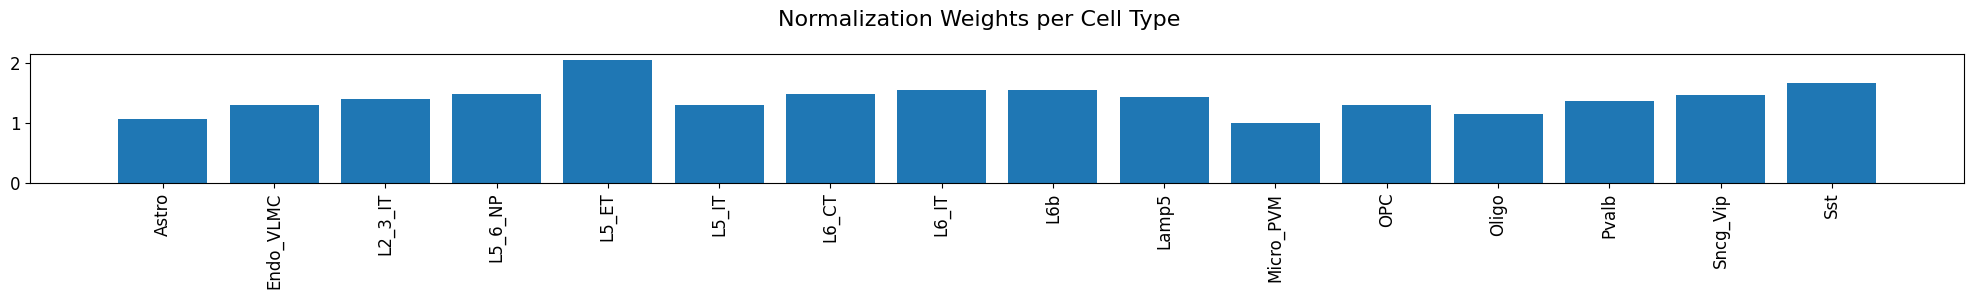

In [71]:
%matplotlib inline
crested.pl.bar.normalization_weights(
    adata, title="Normalization Weights per Cell Type", x_label_rotation=90
)

In [72]:
outdir = f"../data/{experiment}/10x/"
os.makedirs(outdir, exist_ok=True)
adata.write_h5ad(os.path.join(outdir, "normalized.h5ad"))

In [73]:
crested.pp.filter_regions_on_specificity(adata, gini_std_threshold=1.0)

2025-06-18T16:44:00.483934+0200 INFO After specificity filtering, kept 126490 out of 808843 regions.


In [74]:
adata.write_h5ad(os.path.join(outdir, "normalized_specific.h5ad"))

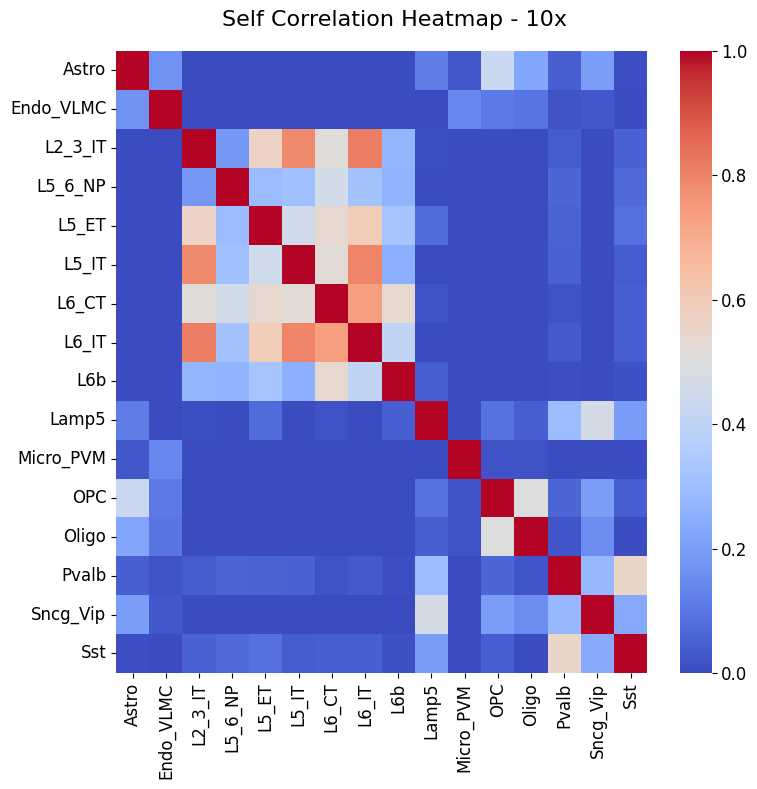

In [75]:
# specific peaks heatmap
crested.pl.heatmap.correlations_self(
    adata,
    title="Self Correlation Heatmap - 10x",
    x_label_rotation=90,
    width=8,
    height=8,
    vmax=1,
    log_transform=False,
    vmin=0.0,
)

## HydropV2

In [ ]:
bigwigs_folder = os.path.join(bigwigs_root, "hydrop_limitedcells_36kreads")

In [77]:
adata = crested.import_bigwigs(
    bigwigs_folder=bigwigs_folder,
    regions_file=consensus_regions_file,
    target_region_width=1000,  
    target="mean",  
)
adata

2025-06-18T16:44:15.759003+0200 INFO Extracting values from 16 bigWig files...


AnnData object with n_obs × n_vars = 16 × 808845
    obs: 'file_path'
    var: 'chr', 'start', 'end'

In [78]:
adata.obs_names = adata.obs_names.str.split("___").str[0]
adata.obs_names

Index(['Astro', 'Endo_VLMC', 'L2_3_IT', 'L5_6_NP', 'L5_ET', 'L5_IT', 'L6_CT',
       'L6_IT', 'L6b', 'Lamp5', 'Micro_PVM', 'OPC', 'Oligo', 'Pvalb',
       'Sncg_Vip', 'Sst'],
      dtype='object')

In [79]:
# add folds columns to adata.var
split_by_chromosome_folds(adata, k=k_folds)

In [80]:
adata.var

,chr,start,end,fold_0,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,fold_7,fold_8,fold_9
region,,,,,,,,,,,,,
chr1:3094286-3094786,chr1,3094286,3094786,val,train,train,train,train,train,train,train,train,train
chr1:3097001-3097501,chr1,3097001,3097501,val,train,train,train,train,train,train,train,train,train
chr1:3097804-3098304,chr1,3097804,3098304,val,train,train,train,train,train,train,train,train,train
chr1:3112437-3112937,chr1,3112437,3112937,val,train,train,train,train,train,train,train,train,train
chr1:3118739-3119239,chr1,3118739,3119239,val,train,train,train,train,train,train,train,train,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY:1050180-1050680,chrY,1050180,1050680,val,train,train,train,train,train,train,train,train,train
chrY:872845-873345,chrY,872845,873345,train,val,train,train,train,train,train,train,train,train
chrY:1245537-1246037,chrY,1245537,1246037,train,train,val,train,train,train,train,train,train,train


In [81]:
adata.var['fold_0'].value_counts()

fold_0
train    727952
val       80893
Name: count, dtype: int64

In [82]:
adata.var[(adata.var['chr'] == 'chr1')]['fold_0'].value_counts()

fold_0
train    51777
val       5753
Name: count, dtype: int64

In [83]:
crested.pp.change_regions_width(
    adata,
    2114,
)

2025-06-18T16:45:30.051900+0200 WARNING Region chrM:-362-1752 with coordinates chrM:-362-1752 is out of bounds for chromosome chrM. Removing region.
2025-06-18T16:45:30.079980+0200 WARNING Region chrM:14601-16715 with coordinates chrM:14601-16715 is out of bounds for chromosome chrM. Removing region.


In [84]:
crested.pp.normalize_peaks(
    adata, top_k_percent=0.03
) 

2025-06-18T16:45:44.628371+0200 INFO Filtering on top k Gini scores...
2025-06-18T16:45:50.488973+0200 INFO Added normalization weights to adata.obsm['weights']...


,chr,start,end,fold_0,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,fold_7,fold_8,fold_9
region,,,,,,,,,,,,,
chr8:11634768-11636882,chr8,11634768,11636882,train,train,train,train,train,train,train,val,train,train
chr8:13616752-13618866,chr8,13616752,13618866,train,train,train,train,train,train,train,val,train,train
chr8:14961048-14963162,chr8,14961048,14963162,train,train,train,train,train,train,train,val,train,train
chr5:135731663-135733777,chr5,135731663,135733777,train,train,train,train,train,train,train,train,train,val
chr19:24270921-24273035,chr19,24270921,24273035,train,train,train,train,train,val,train,train,train,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr11:105123099-105125213,chr11,105123099,105125213,train,train,train,train,train,train,val,train,train,train
chr8:126473481-126475595,chr8,126473481,126475595,train,train,train,train,train,train,train,val,train,train
chr8:126835648-126837762,chr8,126835648,126837762,train,train,train,train,train,train,train,val,train,train


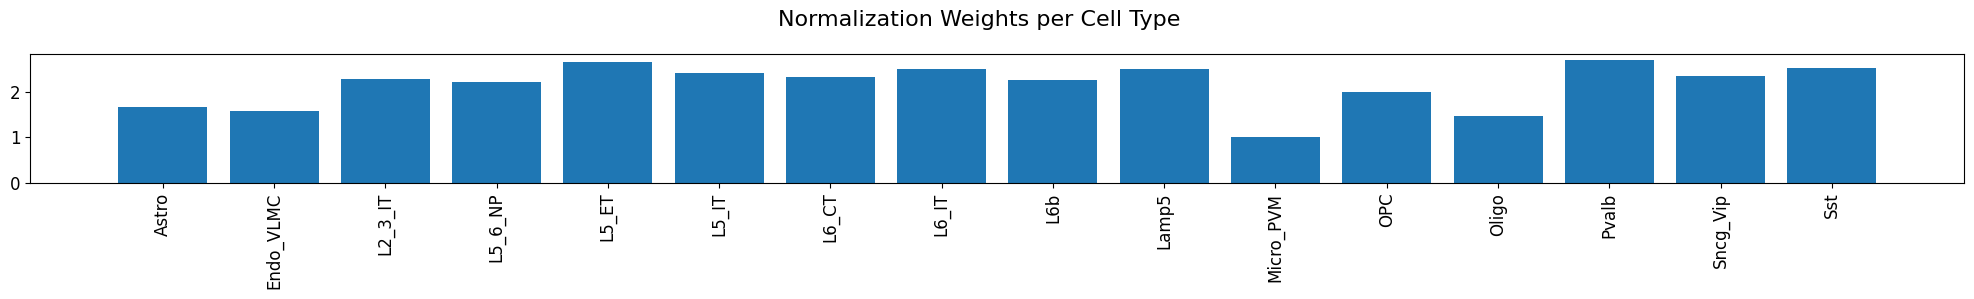

In [85]:
%matplotlib inline
crested.pl.bar.normalization_weights(
    adata, title="Normalization Weights per Cell Type", x_label_rotation=90
)

In [86]:
outdir = f"../data/{experiment}/Hydropv2/"
os.makedirs(outdir, exist_ok=True)
adata.write_h5ad(os.path.join(outdir, "normalized.h5ad"))

In [87]:
crested.pp.filter_regions_on_specificity(adata, gini_std_threshold=1.0)

2025-06-18T16:46:06.650635+0200 INFO After specificity filtering, kept 130344 out of 808843 regions.


In [88]:
adata.write_h5ad(os.path.join(outdir, "normalized_specific.h5ad"))

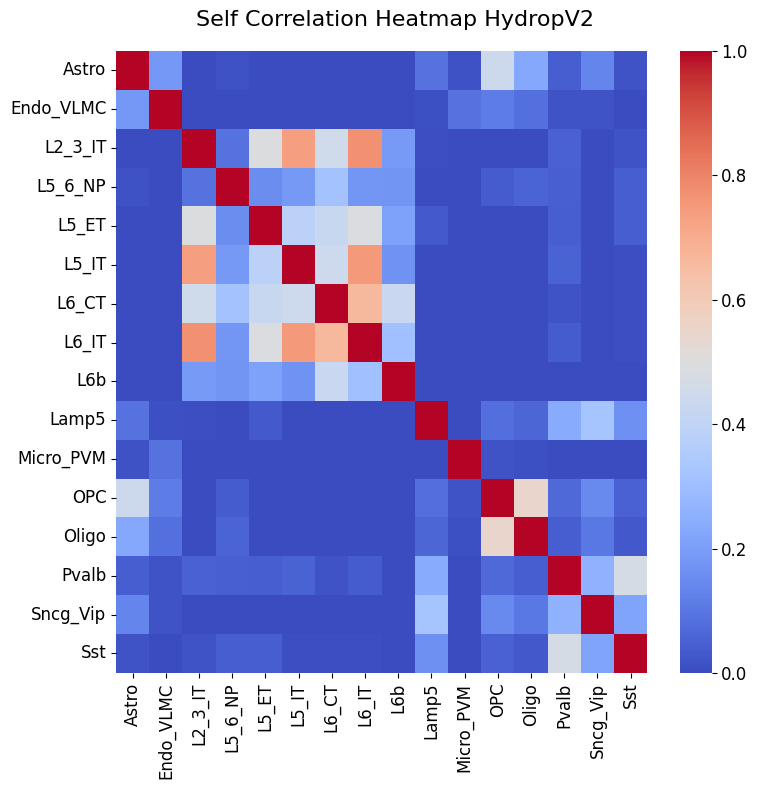

In [89]:
crested.pl.heatmap.correlations_self(
    adata,
    title="Self Correlation Heatmap HydropV2",
    x_label_rotation=90,
    width=8,
    height=8,
    vmax=1,
    log_transform=False,
    vmin=0.0,
)